#  Exerciese 7-1

## Myokyung Han (20224230)

# Data Downloading

### Exchange Rate - krw_usd_xr.xlsx
https://www.deepsearch.com/analytics/economic-indicator?pageView=1&symbol=BOK%3A036Y001.0000001

### Current Account - Korea - current_account_korea.xlsx
https://www.deepsearch.com/analytics/economic-indicator?pageView=1&symbol=BOK%3A022Y013.000000

### Current Account - US - current_account_us.xlsx
https://www.deepsearch.com/analytics/economic-indicator?pageView=1&symbol=BOK%3AI10Y031.US

### GDP: Korea - gdp_korea.xlsx
https://www.deepsearch.com/analytics/economic-indicator?pageView=1&symbol=BOK%3AI10Y042.KOR

### GDP Growth korea - gdp_growth_korea.xlsx 
https://www.deepsearch.com/analytics/economic-indicator?pageView=1&symbol=BOK%3A901Y001.AI1AA
    
### GDP: US - gdp_us.xlsx
https://www.deepsearch.com/analytics/economic-indicator?pageView=1&symbol=BOK%3AI10Y042.USA

### GDP Growth US - gdp_growth_us.xlsx
https://www.deepsearch.com/analytics/economic-indicator?pageView=1&symbol=BOK%3AI10Y041.USA

### Consumer Price Index: Korea - cpi_korea.xlsx >> non stationary
https://www.deepsearch.com/analytics/economic-indicator?pageView=1&symbol=BOK%3AI10Y022.KR

### Consumer Price Index: US - cpi_us.xlsx >> non stationary
https://www.deepsearch.com/analytics/economic-indicator?pageView=1&symbol=BOK%3AI10Y022.US

### 1-year Interest Rate: Korea - int_rate_korea.xlsx
https://www.deepsearch.com/analytics/economic-indicator?pageView=1&symbol=BOK%3A060Y001.010190000
m
### 1-year Interest Rate: US - int_rate_us.xlsx

https://www.deepsearch.com/analytics/economic-indicator?pageView=1&symbol=FRED%3ADGS1

### Foreign Reserves at Bank of Korea - foreign_reserves.xlsx >> non stationary
https://www.deepsearch.com/analytics/economic-indicator?pageView=1&symbol=BOK%3A901Y001.AI1DC

## Data Loading

In [1]:
import pandas as pd

In [2]:
def load_deepsearch_data(filepath, column):
    df = pd.read_excel(filepath)
    df['날짜'] = pd.to_datetime(df['날짜'])
    df = df.set_index('날짜')
    df.columns = [column]
    
    return df

In [3]:
filenames = [
    'krw_usd_xr',
    'current_account_korea', 'current_account_us',
    'gdp_korea', 'gdp_us',
    'gdp_growth_korea', 'gdp_growth_us',
    'cpi_korea', 'cpi_us',
    'int_rate_korea', 'int_rate_us',
    'foreign_reserves',
]

In [4]:
dfs = []
for fname in filenames:
    print('Loading {}...'.format(fname))
    # 짱신기해...
    # filepath = './data/{}.xlxs'.format(fname)와 동일
    filepath = f'./data/{fname}.xlsx'
    
    df = load_deepsearch_data(filepath, fname)
    
    if fname in ['gdp_growth_korea', 'gdp_growth_us', 'current_account_us']:
        df[fname] = df[fname].rolling(4).sum()
    elif fname in ['current_account_korea']:
        df[fname] = df[fname].rolling(12).sum()
        
    
    dfs.append(df)
    
print('Data loading is completed')

Loading krw_usd_xr...
Loading current_account_korea...
Loading current_account_us...
Loading gdp_korea...
Loading gdp_us...
Loading gdp_growth_korea...
Loading gdp_growth_us...
Loading cpi_korea...
Loading cpi_us...
Loading int_rate_korea...
Loading int_rate_us...
Loading foreign_reserves...
Data loading is completed


In [5]:
from pandas.tseries.offsets import YearEnd

In [6]:
def load_world_bank_data(filepath, column):
    df = pd.read_excel(filepath, sheet_name = 'Data', skiprows = 3)
    
    df = df.set_index('Country Code')
    df = df.loc['KOR'].to_frame()
    
    df = df.iloc[3:]
    df.dropna(inplace=True)
    df['KOR'] = df['KOR'].astype(float)
    df['date'] = pd.to_datetime(df.index)+YearEnd(0)
    df.set_index('date', inplace=True)
    df.columns = [column]
    return df
      
    

In [7]:
df_ppp_xr = load_world_bank_data('./data/world_ppp_xr.xls', 'krw_usd_ppp_xr')

In [8]:
dfs.append(df_ppp_xr)

In [9]:
len(dfs)

13

In [10]:
df_merged = pd.concat(dfs, axis = 1)

In [11]:
df_merged = df_merged.resample('M').last()

In [12]:
df_merged = df_merged.fillna(method='ffill')

In [13]:
df_merged['2010-01-01':].head()

,krw_usd_xr,current_account_korea,current_account_us,gdp_korea,gdp_us,gdp_growth_korea,gdp_growth_us,cpi_korea,cpi_us,int_rate_korea,int_rate_us,foreign_reserves,krw_usd_ppp_xr
2010-01-31,1156.5,31135.4,-372522.0,943941.9,14448932.0,5.1,0.3,98.82,99.37,3.22,0.30,273693584.0,828.420848
2010-02-28,1158.4,25800.0,-372522.0,943941.9,14448932.0,7.0,0.3,99.02,99.40,3.07,0.32,270659721.0,828.420848
2010-03-31,1130.8,20931.1,-382165.0,943941.9,14448932.0,7.0,1.8,99.22,99.81,2.70,0.41,272331061.0,828.420848
2010-04-30,1115.5,18588.8,-382165.0,943941.9,14448932.0,7.0,1.8,99.62,99.98,2.65,0.41,278873477.0,828.420848
2010-05-31,1200.2,22909.8,-382165.0,943941.9,14448932.0,7.6,1.8,99.72,100.06,2.75,0.34,270221038.0,828.420848


In [14]:
df_merged['2010-01-01':].tail()

,krw_usd_xr,current_account_korea,current_account_us,gdp_korea,gdp_us,gdp_growth_korea,gdp_growth_us,cpi_korea,cpi_us,int_rate_korea,int_rate_us,foreign_reserves,krw_usd_ppp_xr
2021-12-31,1185.5,90382.5,-783982.0,1637895.8,20893746.0,3.7,4.8,120.45,127.86,1.350,0.39,463118362.0,824.604924
2022-01-31,1202.4,85133.4,-783982.0,1637895.8,20893746.0,3.7,4.8,121.21,128.93,1.463,0.78,461526656.0,824.604924
2022-02-28,1202.7,85133.4,-783982.0,1637895.8,20893746.0,3.7,4.8,121.21,128.93,1.503,1.01,461766293.0,824.604924
2022-03-31,1210.8,85133.4,-783982.0,1637895.8,20893746.0,3.7,4.8,121.21,128.93,1.815,1.63,461766293.0,824.604924
2022-04-30,1216.7,85133.4,-783982.0,1637895.8,20893746.0,3.7,4.8,121.21,128.93,1.852,1.63,461766293.0,824.604924


## Compute new variables

### Currency returens

In [15]:
df_merged['ann_ret']  = df_merged['krw_usd_xr'] .pct_change(periods=12)*100

In [16]:
df_merged['F12.ann_ret'] = df_merged['ann_ret'].shift(-12)

### Real XR

In [17]:
df_merged['real_xr'] = df_merged['krw_usd_ppp_xr']  /df_merged['krw_usd_xr']  

### current account relative to GDP
non_stationary!!

In [18]:
df_merged['ca_gdp_korea'] = df_merged['current_account_korea']/df_merged['gdp_korea']*100

In [19]:
df_merged['ca_gdp_us'] = df_merged['current_account_us']/df_merged['gdp_us']*100

In [20]:
df_merged.loc['2019-10-01':][['ca_gdp_korea', 'ca_gdp_us']].head()

,ca_gdp_korea,ca_gdp_us
2019-10-31,3.470373,-2.601153
2019-11-30,3.519438,-2.601153
2019-12-31,3.651917,-2.325728
2020-01-31,3.512475,-2.325728
2020-02-29,3.665722,-2.325728


### GDP Growth

In [21]:
df_merged['gdp_growth_korea2'] = df_merged['gdp_korea'].pct_change(periods=12)*100

In [22]:
df_merged['gdp_growth_us2'] = df_merged['gdp_us'].pct_change(periods=12)*100

In [23]:
df_merged.loc[['2018-12-31', '2019-12-31']][['gdp_us', 'gdp_growth_us','gdp_growth_us2']]

,gdp_us,gdp_growth_us,gdp_growth_us2
2018-12-31,20580223.0,2.5,5.434581
2019-12-31,21427700.0,2.3,4.117919


In [24]:
# why is it differnece!!!!
# https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=US
# Current US 달러이냐 constant us dollar이냐에 따라 달라진다. 
# Current US>> market
# constant us dollar >> inflation.... 2015년 기준으로 보았을때 2.5가 된다..

### Inflation

In [25]:
df_merged['infl_korea'] = df_merged['cpi_korea'].pct_change(periods=12)*100

In [26]:
df_merged['infl_us'] = df_merged['cpi_us'].pct_change(periods=12)*100

### Inflation Interest rate differential

In [27]:
df_merged['infl_diff'] = df_merged['infl_korea']- df_merged['infl_us']

In [28]:
df_merged['int_rate_diff'] = df_merged['int_rate_korea']- df_merged['int_rate_us']

### Foreign Reserves

In [29]:
df_merged['reserves_to_gdp'] = df_merged['foreign_reserves']/df_merged['gdp_korea']/1000*100
# 1000 >>단위때문에 곱하고

In [30]:
df_merged['reserves_growth'] = df_merged['foreign_reserves'].pct_change(periods=12)*100
# 다시 들어야겠따...
# trand how it is changing ......

In [31]:
df_merged.columns

Index(['krw_usd_xr', 'current_account_korea', 'current_account_us',
       'gdp_korea', 'gdp_us', 'gdp_growth_korea', 'gdp_growth_us', 'cpi_korea',
       'cpi_us', 'int_rate_korea', 'int_rate_us', 'foreign_reserves',
       'krw_usd_ppp_xr', 'ann_ret', 'F12.ann_ret', 'real_xr', 'ca_gdp_korea',
       'ca_gdp_us', 'gdp_growth_korea2', 'gdp_growth_us2', 'infl_korea',
       'infl_us', 'infl_diff', 'int_rate_diff', 'reserves_to_gdp',
       'reserves_growth'],
      dtype='object')

In [32]:
df_sample = df_merged[['F12.ann_ret', 'real_xr', 'ca_gdp_korea', 'ca_gdp_us'
                       , 'gdp_growth_korea', 'gdp_growth_us', 
                      'infl_diff', 'int_rate_diff', 
                      'reserves_to_gdp' , 'reserves_growth']]

In [33]:
df_sample = df_sample.dropna()

In [34]:
df_sample.head()

,F12.ann_ret,real_xr,ca_gdp_korea,ca_gdp_us,gdp_growth_korea,gdp_growth_us,infl_diff,int_rate_diff,reserves_to_gdp,reserves_growth
2000-02-29,10.063615,0.666984,3.573325,-2.994249,12.0,4.7,-1.453178,2.05,16.015309,43.763932
2000-03-31,19.823153,0.681127,3.230006,-3.326220,12.0,4.2,-1.637996,2.04,16.803024,45.599751
2000-04-30,19.310096,0.679900,2.742859,-3.326220,12.0,4.2,-1.630910,2.08,16.996802,42.773058
2000-05-31,14.032457,0.665808,2.664657,-3.326220,8.9,4.2,-2.082471,1.98,17.440132,41.378918
2000-06-30,16.675637,0.677156,2.589429,-3.624226,8.9,5.2,-1.515722,2.03,18.114831,45.479712


In [35]:
corr = df_sample.corr()

In [36]:
import seaborn as sns

<AxesSubplot:>

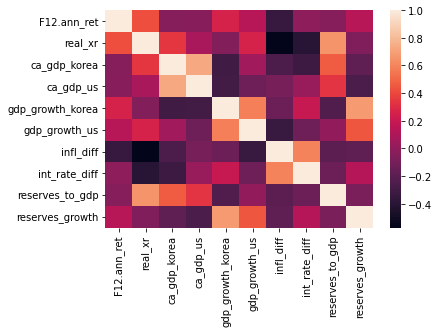

In [37]:
sns.heatmap(corr)

In [38]:
import numpy as np

In [39]:
# upper triangle 만 고르는 법  
mask = np.triu(np.ones_like(corr, dtype=bool))

In [40]:
corr.shape

(10, 10)

In [41]:
cmap = sns.diverging_palette(230, 30, as_cmap=True)

<AxesSubplot:>

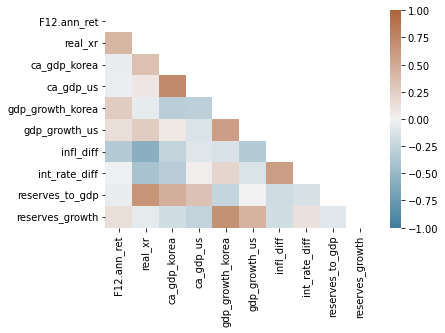

In [42]:
sns.heatmap(corr, cmap=cmap, mask = mask, vmin=-1, vmax=1)

## OLS Regression

In [43]:
import statsmodels.api as sm

In [44]:
Y  = df_sample['F12.ann_ret']

### Predict without foreign reserves

In [45]:
X = df_sample.iloc[:, 1:-2]

In [46]:
X = sm.add_constant(X)

/Users/boysbeanxious/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [47]:
X.head()

,const,real_xr,ca_gdp_korea,ca_gdp_us,gdp_growth_korea,gdp_growth_us,infl_diff,int_rate_diff
2000-02-29,1.0,0.666984,3.573325,-2.994249,12.0,4.7,-1.453178,2.05
2000-03-31,1.0,0.681127,3.230006,-3.326220,12.0,4.2,-1.637996,2.04
2000-04-30,1.0,0.679900,2.742859,-3.326220,12.0,4.2,-1.630910,2.08
2000-05-31,1.0,0.665808,2.664657,-3.326220,8.9,4.2,-2.082471,1.98
2000-06-30,1.0,0.677156,2.589429,-3.624226,8.9,5.2,-1.515722,2.03


In [48]:
results = sm.OLS(Y,X).fit()

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     17.46
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           9.58e-19
Time:                        16:32:00   Log-Likelihood:                -924.34
No. Observations:                 255   AIC:                             1865.
Df Residuals:                     247   BIC:                             1893.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -49.8745      7.760     -6.428      0.000     -65.158     -34.591
real_xr             68.3125      9.968      6.853      0.000      48.680      87.945
ca_gdp_korea        -0.7798      0.482     -1.618      0.107      -1.729       0.170
ca_gdp_us            0.6364      0.789      0.807      0.421      -0.918       2.191
gdp_growth_korea     1.3737      0.338      4.061      0.000       0.708       2.040
gdp_growth_us       -1.0810      0.385     -2.809      0.005      -1.839      -0.323
infl_diff           -2.1054      0.717     -2.935      0.004      -3.518      -0.693
int_rate_diff        1.5021      0.648      2.318      0.021       0.226       2.778
==============================================================================
Omnibus:                       96.060   Durbin-Watson:                   0.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              366.240
Skew:                           1.551   Prob(JB):                     2.96e-80
Kurtosis:                       7.984   Cond. No.                         145.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

real_xr/gdp_growth_korea
gdp_growth_korea 가 오르면 환율은 내려가지 않나....  
..... 배운대로 이론대로 되진 않는다.....
ca_gdp_korea는 생각보다 정보를 주지 못한다

### (2) Predict with foreign reserves  
> exchange rate policy is important by comparing two model  
> infl_diff is now insignificant(t-statistics) because of correlation

In [50]:
X = df_sample.iloc[:, 1:]

In [51]:
X = sm.add_constant(X)

/Users/boysbeanxious/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [52]:
X.head()

,const,real_xr,ca_gdp_korea,ca_gdp_us,gdp_growth_korea,gdp_growth_us,infl_diff,int_rate_diff,reserves_to_gdp,reserves_growth
2000-02-29,1.0,0.666984,3.573325,-2.994249,12.0,4.7,-1.453178,2.05,16.015309,43.763932
2000-03-31,1.0,0.681127,3.230006,-3.326220,12.0,4.2,-1.637996,2.04,16.803024,45.599751
2000-04-30,1.0,0.679900,2.742859,-3.326220,12.0,4.2,-1.630910,2.08,16.996802,42.773058
2000-05-31,1.0,0.665808,2.664657,-3.326220,8.9,4.2,-2.082471,1.98,17.440132,41.378918
2000-06-30,1.0,0.677156,2.589429,-3.624226,8.9,5.2,-1.515722,2.03,18.114831,45.479712


In [53]:
results = sm.OLS(Y,X).fit()

In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     25.26
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           1.76e-30
Time:                        16:32:00   Log-Likelihood:                -891.89
No. Observations:                 255   AIC:                             1804.
Df Residuals:                     245   BIC:                             1839.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -45.6835      6.882     -6.639      0.000     -59.238     -32.129
real_xr            139.8352     12.555     11.138      0.000     115.107     164.564
ca_gdp_korea        -0.3536      0.438     -0.808      0.420      -1.216       0.509
ca_gdp_us            1.6802      0.735      2.285      0.023       0.232       3.128
gdp_growth_korea     0.9455      0.348      2.714      0.007       0.259       1.632
gdp_growth_us       -1.3338      0.342     -3.899      0.000      -2.008      -0.660
infl_diff           -0.6662      0.683     -0.976      0.330      -2.011       0.679
int_rate_diff        1.8244      0.584      3.122      0.002       0.673       2.976
reserves_to_gdp     -2.2560      0.269     -8.379      0.000      -2.786      -1.726
reserves_growth      0.0988      0.064      1.541      0.125      -0.027       0.225
==============================================================================
Omnibus:                      117.502   Durbin-Watson:                   0.304
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              615.466
Skew:                           1.812   Prob(JB):                    2.26e-134
Kurtosis:                       9.693   Cond. No.                         706.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
X

,const,real_xr,ca_gdp_korea,ca_gdp_us,gdp_growth_korea,gdp_growth_us,infl_diff,int_rate_diff,reserves_to_gdp,reserves_growth
2000-02-29,1.0,0.666984,3.573325,-2.994249,12.0,4.7,-1.453178,2.050,16.015309,43.763932
2000-03-31,1.0,0.681127,3.230006,-3.326220,12.0,4.2,-1.637996,2.040,16.803024,45.599751
2000-04-30,1.0,0.679900,2.742859,-3.326220,12.0,4.2,-1.630910,2.080,16.996802,42.773058
2000-05-31,1.0,0.665808,2.664657,-3.326220,8.9,4.2,-2.082471,1.980,17.440132,41.378918
2000-06-30,1.0,0.677156,2.589429,-3.624226,8.9,5.2,-1.515722,2.030,18.114831,45.479712
...,...,...,...,...,...,...,...,...,...,...
2020-12-31,1.0,0.757909,4.611527,-3.102101,-1.6,-1.7,-0.829291,0.641,27.052888,8.385671
2021-01-31,1.0,0.739821,4.981117,-3.102101,-1.6,-1.7,-0.757753,0.570,27.030273,8.073945
2021-02-28,1.0,0.743960,5.082912,-3.102101,1.3,-1.7,-0.541512,0.593,27.325150,9.381409
2021-03-31,1.0,0.727486,5.196197,-3.462878,1.3,1.2,-1.083233,0.620,27.237837,11.472098


In [55]:
columns = ['real_xr', 'ca_gdp_us', 'gdp_growth_korea', 'gdp_growth_us', 'int_rate_diff', 'reserves_to_gdp']

In [56]:
len(columns)

6

In [57]:
X2 = X[['const', *columns]]

In [58]:
results = sm.OLS(Y, X2).fit()

In [59]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     36.66
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           1.13e-31
Time:                        16:32:00   Log-Likelihood:                -894.63
No. Observations:                 255   AIC:                             1803.
Df Residuals:                     248   BIC:                             1828.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -49.8831      6.343     -7.864      0.000     -62.376     -37.390
real_xr            141.5675     10.414     13.594      0.000     121.056     162.079
ca_gdp_us            1.2988      0.455      2.854      0.005       0.402       2.195
gdp_growth_korea     1.3728      0.287      4.779      0.000       0.807       1.939
gdp_growth_us       -1.3238      0.333     -3.975      0.000      -1.980      -0.668
int_rate_diff        1.6435      0.452      3.637      0.000       0.754       2.533
reserves_to_gdp     -2.2548      0.249     -9.052      0.000      -2.745      -1.764
==============================================================================
Omnibus:                      111.392   Durbin-Watson:                   0.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              528.157
Skew:                           1.740   Prob(JB):                    2.05e-115
Kurtosis:                       9.131   Cond. No.                         537.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
import matplotlib.pyplot as plt

In [61]:
plt.rcParams['figure.figsize']  = (10, 4)

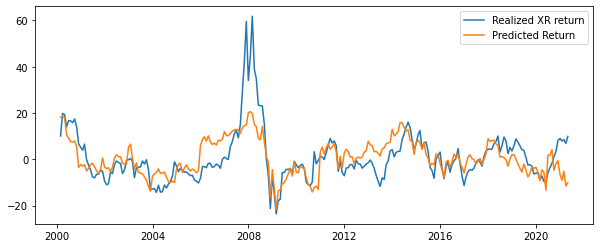

In [62]:
plt.plot(Y, label = 'Realized XR return')
plt.plot(Y.index, results.predict(), label='Predicted Return')
plt.legend()
plt.show()

In [63]:
plt.rcParams['figure.figsize']  = (6, 6)

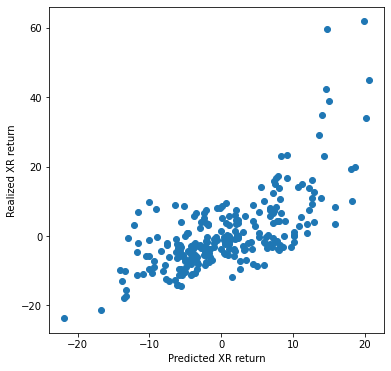

In [64]:
plt.scatter(results.predict(), Y)
plt.xlabel('Predicted XR return')
plt.ylabel('Realized XR return')
plt.show()

X축에는 예측, y축에는 실제값  
만약 잘 예측했다면 45도의 그래프를 그리게 되겠죠  
but error 가 존재함...  
bigger size of the period > crisis...


## XR Forecast

In [65]:
df_merged.tail(3)

,krw_usd_xr,current_account_korea,current_account_us,gdp_korea,gdp_us,gdp_growth_korea,gdp_growth_us,cpi_korea,cpi_us,int_rate_korea,...,ca_gdp_korea,ca_gdp_us,gdp_growth_korea2,gdp_growth_us2,infl_korea,infl_us,infl_diff,int_rate_diff,reserves_to_gdp,reserves_growth
2022-02-28,1202.7,85133.4,-783982.0,1637895.8,20893746.0,3.7,4.8,121.21,128.93,1.503,...,5.19773,-3.752233,0.0,0.0,3.139891,6.889405,-3.749514,0.493,28.192654,3.174745
2022-03-31,1210.8,85133.4,-783982.0,1637895.8,20893746.0,3.7,4.8,121.21,128.93,1.815,...,5.19773,-3.752233,0.0,0.0,2.990908,6.141434,-3.150526,0.185,28.192654,3.505480
2022-04-30,1216.7,85133.4,-783982.0,1637895.8,20893746.0,3.7,4.8,121.21,128.93,1.852,...,5.19773,-3.752233,0.0,0.0,2.772596,5.274761,-2.502165,0.222,28.192654,2.090744


In [66]:
last_obs = df_merged.iloc[-1]

In [67]:
last_xr = last_obs['krw_usd_xr']

In [68]:
last_xr

1216.7

In [69]:
# exog = exogeneous variables
exog = last_obs[columns]

In [70]:
exog

real_xr              0.677739
ca_gdp_us           -3.752233
gdp_growth_korea     3.700000
gdp_growth_us        4.800000
int_rate_diff        0.222000
reserves_to_gdp     28.192654
Name: 2022-04-30 00:00:00, dtype: float64

In [71]:
exog = [1, *exog]

In [72]:
exog

[1,
 0.6777389035916824,
 -3.7522328451776907,
 3.7000000000000015,
 4.799999999999999,
 0.2220000000000002,
 28.192653830603874]

In [73]:
pred_ret = results.predict(exog=exog)

In [74]:
pred_xr = last_xr*(1+pred_ret[0]/100)

In [75]:
print('Predicted XR return : {:.2f}%'.format(pred_ret[0]))

Predicted XR return : -23.29%


In [76]:
print('Predicted XR {:.2f} to : {:.2f}'.format(last_xr, pred_xr))

Predicted XR 1216.70 to : 933.34


In [77]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [78]:
for alpha in [.05, .25, .50]:
    prstd, iv_l, iv_u = wls_prediction_std(results, exog = exog, alpha=alpha)
    
    print('Confidence interval at alpha {:.2f} : {:.2f}  ~ {:.2f}'.format( 
        alpha, 
        last_xr*(1+iv_l[0]/100), 
        last_xr*(1+iv_u[0]/100)))

Confidence interval at alpha 0.05 : 730.20  ~ 1136.47
Confidence interval at alpha 0.25 : 814.42  ~ 1052.26
Confidence interval at alpha 0.50 : 863.67  ~ 1003.00
